In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
data = pd.read_csv('projectdataset.csv')           

In [4]:
dataset=data.copy()

In [5]:
#data=data.drop(['Crop_age'],axis=1)
data=data.drop(['SNO','prediction'],axis=1)

In [6]:
data.head(5)

,Temperature,Humidity(%),Wind(m/h),Soil_moisture,Rainfall(cm),Sunshine,Result
0,28.5,49.0,5.80,83.7,9.8,1.4,2
1,21.0,88.9,7.10,93.4,135.0,0.0,8
2,22.0,89.1,7.00,94.8,149.0,0.3,8
3,22.3,91.1,6.95,94.9,150.0,1.0,8
4,22.8,90.0,6.90,93.0,164.0,0.6,9


In [7]:
data.isnull().sum()

Temperature      0
Humidity(%)      0
Wind(m/h)        0
Soil_moisture    0
Rainfall(cm)     0
Sunshine         0
Result           0
dtype: int64

### Data Representation & Comparison

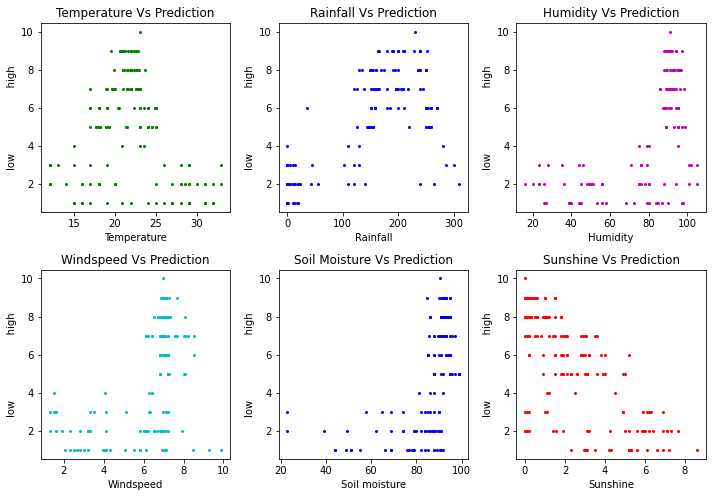

In [8]:
plt.figure(figsize=(10,10))



plt.subplot(3,3,1)
plt.xlabel("Temperature") 
plt.ylabel("low                     high")
plt.title('Temperature Vs Prediction')
plt.scatter(data['Temperature'], data['Result'], s=4, c='g')

plt.subplot(3,3,2)
plt.xlabel("Rainfall") 
plt.ylabel("low                     high")
plt.title('Rainfall Vs Prediction')
plt.scatter(data['Rainfall(cm)'], data['Result'], s=4, c='b')

plt.subplot(3,3,3)
plt.xlabel("Humidity") 
plt.ylabel("low                     high")
plt.title('Humidity Vs Prediction')
plt.scatter(data['Humidity(%)'], data['Result'], s=4, c='m')

plt.subplot(3,3,4)
plt.xlabel("Windspeed") 
plt.ylabel("low                     high")
plt.title('Windspeed Vs Prediction')
plt.scatter(data['Wind(m/h)'], data['Result'], s=4, c='c')

plt.subplot(3,3,5)
plt.xlabel("Soil moisture") 
plt.ylabel("low                     high")
plt.title('Soil Moisture Vs Prediction')
plt.scatter(data['Soil_moisture'], data['Result'], s=4, c='b')

plt.subplot(3,3,6)
plt.xlabel("Sunshine") 
plt.ylabel("low                     high")
plt.title('Sunshine Vs Prediction')
plt.scatter(data['Sunshine'], data['Result'], s=4, c='r')

plt.tight_layout()

# Splitting the data

In [9]:
from sklearn.model_selection import train_test_split
x=data.drop(["Result"] ,axis=1)
y=data["Result"]


In [10]:
x.head()
y.head()

0    2
1    8
2    8
3    8
4    9
Name: Result, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


# Decision Tree


In [12]:

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
prediction=dtree.predict(x_test)

## Decision Tree Plotting

## Decision Tree Evaluation

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
import itertools

In [15]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.33      0.40      0.36         5
           2       0.12      0.20      0.15         5
           3       0.50      0.14      0.22         7
           4       0.00      0.00      0.00         1
           5       0.60      1.00      0.75         6
           6       0.67      0.25      0.36         8
           7       0.38      0.43      0.40         7
           8       0.80      0.44      0.57         9
           9       0.00      0.00      0.00         2

    accuracy                           0.38        50
   macro avg       0.38      0.32      0.31        50
weighted avg       0.49      0.38      0.39        50



## Descision Tree Confusion Matrix Plot

C:\Users\user\Anaconda3\envs\project\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


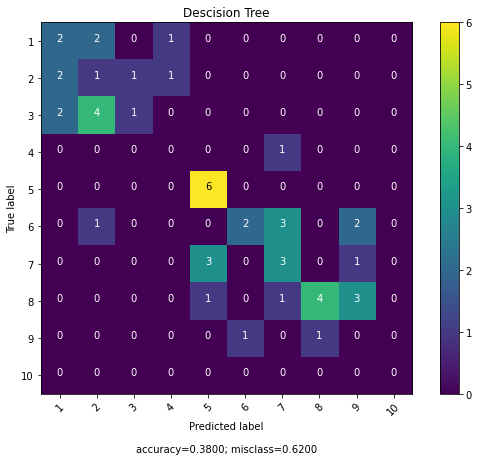

In [16]:
label = list(dtree.classes_)
target_names = label
cm = confusion_matrix(y_test, prediction, label)
accuracy = np.trace(cm) / np.sum(cm).astype('float')
misclass = 1 - accuracy


plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest')
plt.title("Descision Tree")
plt.colorbar()


if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)


thresh = cm.max() / 1.5
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "{:,}".format(cm[i, j]),
             horizontalalignment="center",
             color="black" if cm[i, j] > thresh else "white")


plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show()


# Random forest


In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [18]:
rfc_pred=rfc.predict(x_test)

## RFC Confusion Matrix Plot

C:\Users\user\Anaconda3\envs\project\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


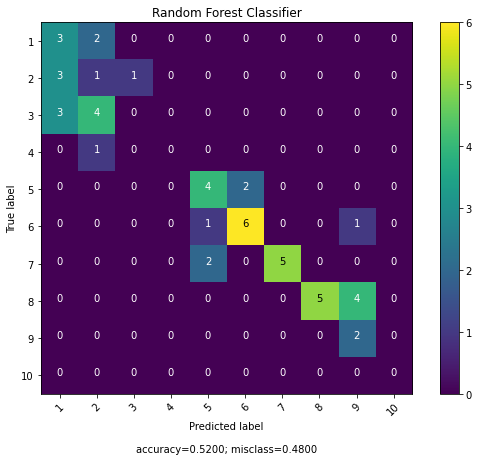

In [19]:
label = list(rfc.classes_)
target_names = label
cm = confusion_matrix(y_test, rfc_pred, label)
accuracy = np.trace(cm) / np.sum(cm).astype('float')
misclass = 1 - accuracy


plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest')
plt.title("Random Forest Classifier")
plt.colorbar()

if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)


thresh = cm.max() / 1.5
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "{:,}".format(cm[i, j]),
             horizontalalignment="center",
             color="black" if cm[i, j] > thresh else "white")


plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show()

# Test RFC Plot


In [20]:

#check=[[34,25,4.8,90,150,5]]
check=[[28.5 ,49.0 ,5.80 ,83.7 ,9.8 ,1.4]]
res=[1]
rfc_pred=rfc.predict(check)
print(rfc_pred[0])

2


# SVM

In [21]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [22]:
predictions=model.predict(x_test)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1
           5       0.15      0.50      0.23         6
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         9
           9       0.13      1.00      0.24         2

    accuracy                           0.20        50
   macro avg       0.07      0.28      0.11        50
weighted avg       0.06      0.20      0.09        50



C:\Users\user\Anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
labels = ['Temperature','Humidity(%)','Wind(m/s)','Soil_moisture','Rainfall(cm)','Sunshine']

# Model Creation

In [25]:
import joblib
joblib.dump(rfc, 'model.pkl')
print("Model dumped!")

Model dumped!


## Saving the data columns from training

In [26]:
model_columns = list(x.columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("Models columns dumped!")

Models columns dumped!


## Load the model that was saved

In [27]:
rfc = joblib.load('model.pkl')